## ${\color{Salmon} \text{ Part I: }}$ ${\color{Blue} \text{ Spectrum Estimation }}$

The random process that we shall use is of the form
$$
\begin{equation}
y_k = A_1 \cos(2\pi f_1 k + \phi_1) + A_2 \cos(2\pi f_2 k + \phi_2) + v_k
\end{equation}
$$
where $v_k$ is zero-mean unit variance white Gaussian noise. The phases $\phi_i$ are uniform over $[0, 2\pi]$, whereas the default values for the sinusoid amplitudes and frequencies are $A_1 = 20, A_2 = 20, f_1 = 0.057, f_2 = 0.082$.

#### ${\color{Green} (a)}$ ${\color{Blue} \text{ For the periodogram, how many data points N are required to resolve the two sinusoids? Why? }}$

The number of data points $N$ required to resolve two sinusoids in the periodogram depends on the difference in their frequencies ($f_1$ and $f_2$), the length of the observation window, and the sampling rate.

The resolution of the periodogram is determined by the frequency bin width, which is inversely proportional to the length of the observation window. The formula for the frequency resolution ($\Delta f$) in the periodogram is given by: 

$\Delta f = \frac{1}{T}$

where $T$ is the length of the observation window.

To resolve two sinusoids, their frequencies ($f_1$ and $f_2$) should be separated by at least half of the frequency resolution ($\Delta f/2$) to avoid ambiguity. In other words, the criterion for resolving two sinusoids is:

$|f_1 - f_2| \geq \frac{1}{2T}$

So, the minimum required number of data points ($N$) is related to the observation window length ($T$) as follows:

$N \geq 2f_{\text{max}}T$

where $f_{\text{max}}$ is the maximum frequency of interest, and $T$ is the length of the observation window.

Keep in mind that this is a simplified explanation, and the actual resolution might depend on the specific characteristics of the signal, the noise level, and the analysis technique used. In practice, it's common to choose $N$ to be a power of 2 to leverage fast Fourier transform (FFT) algorithms efficiently.

In [16]:
using Plots

In [17]:
include("window.jl")

window (generic function with 1 method)

In [18]:
# Parameters
N = 256
f1, f2 = 0.057, 0.082
A1, A2 = 20, 20
phi1, phi2 = 2π * rand(), 2π * rand()
v = randn(N);  # White Gaussian noise

In [19]:
type = "hamming"  # Replace with the desired window type
# N = 10  # Replace with the desired window length
w = window(type, N);

In [20]:
using FFTW

In [21]:
include("periodo.jl")

periodo (generic function with 1 method)

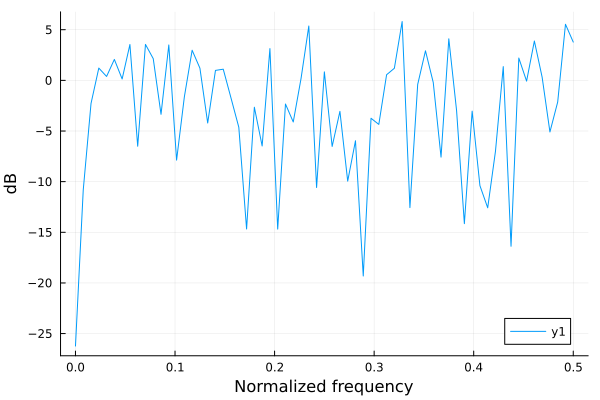

In [22]:
# Example usage
signal = randn(1000)  # Replace with your signal
N = 128  # Replace with the desired number of bins
periodo(signal, N)

In [23]:
include("sigm.jl")

sig (generic function with 2 methods)

In [24]:
# Generate the signal
N = 8
y = sig(N);

t = 1:8


t = 1:256


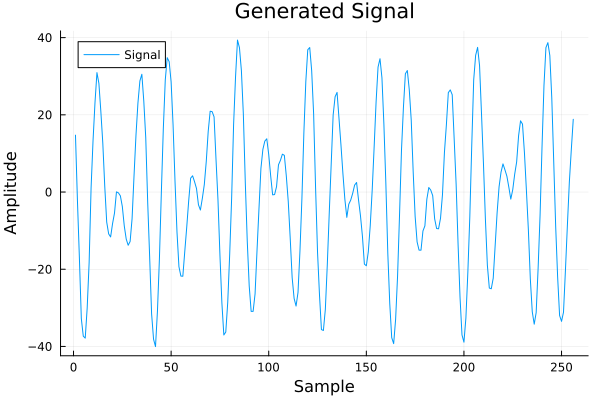

In [25]:
# Plot the signal
plot(sig(256)
    , label = "Signal"
    , xlabel = "Sample", ylabel = "Amplitude"
    , title = "Generated Signal"
)